##MNIST
2개의 히든 레이어를 도입한다.
input layer는 28*28개의 노드
hidden layer의 노드의 수는 자유롭게 설정해도 좋다.
output은 10개(0~9)로 설정한다.
test data를 예측하여 정확도를 최대가 되도록 학습하여라.
제출 시 test data의 정확도를 출력하여 제출하세요.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,                         
    transform = torchvision.transforms.ToTensor(), 
    download = True,            
)
test_data = torchvision.datasets.MNIST(
    root = 'data', 
    train = False, 
    transform = torchvision.transforms.ToTensor()
)

In [19]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
train_data.data.size()

torch.Size([60000, 28, 28])

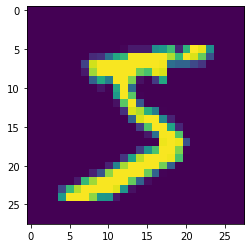

In [23]:
import matplotlib.pyplot as plt

plt.imshow(train_data.data[0])

In [24]:
torch.flatten(train_data.data, start_dim=1)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [26]:
X=torch.flatten(train_data.data,start_dim=1).float()
y=train_data.targets
X=X/255 # 데이터를 0~1로 정규화
X, y

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5, 0, 4,  ..., 5, 6, 8]))

In [27]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_sizes[0]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[0], hidden_sizes[1]),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_sizes[1], output_size),
    torch.nn.Softmax(dim=1)
)
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


In [11]:
correct = (model(X).max(1)[1] == y)
accuracy = correct.sum()/y.size(0)
accuracy

tensor(0.1455)

In [28]:
din, dh1, dh2, dout = 28*28,128,64,10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.ReLU(),         # activation function of hidden layer 
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [29]:
nums_epoch = 101
def train(model, criterion, optimizer, nums_epoch, X,y):
    for epoch in range(nums_epoch):
        y_pred = model(X)
        loss = criterion(y_pred,y)
        optimizer.zero_grad() # zero_grad(): 미분값 초기화
        loss.backward() # backpropagation
        optimizer.step() # update weights and biases
        
        if(epoch%10==0):
            prediction = y_pred.max(1)[1] # max indices
            corrects = (prediction == y)
            accuracy = corrects.sum().float() / float( y.size(0) )
            print(epoch, "loss=", loss.item(), "accu=", accuracy.item())

In [15]:
train(model,criterion, optimizer, nums_epoch, X, y);

0 loss= 2.3541195392608643 accu= 0.1017666682600975
10 loss= 1.8880069255828857 accu= 0.5696666836738586
20 loss= 1.7725263833999634 accu= 0.6870833039283752
30 loss= 1.7194937467575073 accu= 0.7404166460037231
40 loss= 1.7030593156814575 accu= 0.756850004196167
50 loss= 1.692674994468689 accu= 0.7674333453178406
60 loss= 1.6865606307983398 accu= 0.7736999988555908
70 loss= 1.682666301727295 accu= 0.7772833108901978
80 loss= 1.6795735359191895 accu= 0.7804666757583618
90 loss= 1.6772348880767822 accu= 0.7824500203132629
100 loss= 1.6752370595932007 accu= 0.7841333150863647


In [30]:
din, dh1, dh2, dout = 28*28,128,64,10
prob_drop = 0.4
model_dilution = torch.nn.Sequential(
    torch.nn.Linear(din,dh1), # input - hidden1
    torch.nn.Dropout(p=prob_drop), # dropout
    torch.nn.ReLU(),         # activation function of hidden layer
    
    torch.nn.Linear(dh1,dh2), # input - hidden1
    torch.nn.Dropout(p=prob_drop),
    torch.nn.ReLU(),         # activation function of hidden layer 
    
    torch.nn.Linear(dh2,dout), # hidden - out
    torch.nn.Softmax(dim=1)
)

# loss and optimizer
learning_rate = 0.001
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_dilution.parameters(),lr=learning_rate)

In [31]:
train(model_dilution, criterion, optimizer, nums_epoch, X, y) 

0 loss= 2.302513599395752 accu= 0.1113833338022232
10 loss= 2.2490859031677246 accu= 0.4059000015258789
20 loss= 2.088721513748169 accu= 0.48625001311302185
30 loss= 1.9458431005477905 accu= 0.5583166480064392
40 loss= 1.8497886657714844 accu= 0.6567000150680542
50 loss= 1.786133885383606 accu= 0.7022500038146973
60 loss= 1.7440131902694702 accu= 0.744183361530304
70 loss= 1.7117894887924194 accu= 0.770883321762085
80 loss= 1.6812740564346313 accu= 0.8046166896820068
90 loss= 1.6520662307739258 accu= 0.8351166844367981
100 loss= 1.6297314167022705 accu= 0.8540666699409485
